## Libraries Required

In [1]:
import re
import time
import aranorm
import random
import numpy as np
import pandas as pd
import seaborn as sns
import preprocess_arabert
from sklearn.model_selection import train_test_split

In [2]:
seed=42
random.seed(seed)

In [3]:
df= pd.read_csv("fetchingTweets_dialect_dataset.csv")

In [5]:
df.head()

,id,dialect,tweets
0,1175358310087892992,IQ,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .
1,1175416117793349632,IQ,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...
2,1175450108898565888,IQ,@KanaanRema مبين من كلامه خليجي
3,1175471073770573824,IQ,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐
4,1175496913145217024,IQ,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺


In [4]:
print("DataFrame Shape:",df.shape,"\n")
print("  DataFrame Info","\n","-"*20)
df.info()
print("")

DataFrame Shape: (458197, 3) 

  DataFrame Info 
 --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458197 entries, 0 to 458196
Data columns (total 3 columns):
id         458197 non-null int64
dialect    458197 non-null object
tweets     458197 non-null object
dtypes: int64(1), object(2)
memory usage: 10.5+ MB



In [6]:
df[df.isnull().any(axis=1)]

,id,dialect,tweets


In [7]:
tweets = list(df["tweets"])

In [8]:
s=time.time()
text_preprocessed = [preprocess_arabert.preprocess(txt, do_farasa_tokenization=True) for txt in tweets] 
text_preprocessed=[aranorm.normalize_arabic_text(txt) for txt in text_preprocessed]
e=time.time()
print((e-s)/60,"  Minutes")

1.0158203999201456   Minutes


In [9]:
tweets[:5]

['@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .',
 '@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. حيونه ووحشيه .. وتطلبون من الغرب يحترمكم ويؤمن بدينكم ولاينعتكم بالإرهاب ..',
 '@KanaanRema مبين من كلامه خليجي',
 '@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐',
 '@hmo2406 وين هل الغيبه  اخ محمد 🌸🌺']

In [10]:
text_preprocessed[:5]

['لكن بالنهايه ينتفض يغير',
 'يعني هذا محسوب علي البشر حيونه ووحشيه وتطلبون من الغرب يحترمكم ويءمن بدينكم ولاينعتكم بالارهاب',
 'مبين من كلامه خليجي',
 'يسلملي مرورك وروحك الحلوه',
 'وين هل الغيبه اخ محمد']

In [11]:
df["text_preprocessed"]=text_preprocessed

In [12]:
df.sample(5)

,id,dialect,tweets,text_preprocessed
166826,1046120224498434048,JO,روتين حياتي ممل جداً فلا تنكد علي الله ينكد عليك.,روتين حياتي ممل جدا فلا تنكد علي الله ينكد عليك
301048,1145818238720401408,EG,@ahmedamara37 نفس النظره الي بصها لمرسي,نفس النظره الي بصها لمرسي
412203,1151947556408168448,AE,@Q8yaI @bohamad677 @Almajlliss كلامي واضح و لا...,كلامي واضح و لا تجلسين و ادورين الزله
163706,1036660395266715648,JO,@sallalmahmoud يما ما اقواك😂😂😂ترى قد ما التكنو...,يما ما اقواك تري قد ما التكنو نكد بس والله الج...
406890,966232829490356224,AE,#انا_من_جيل لعبة #المسطاع \n.\nسقا الله ذيكـ ا...,انا من جيل لعبه المسطاع سقا الله ذيك الايام وي...


In [13]:
print("DataFrame Shape:",df.shape,"\n")
print("  DataFrame Info","\n","-"*20)
df.info()
print("")

DataFrame Shape: (458197, 4) 

  DataFrame Info 
 --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458197 entries, 0 to 458196
Data columns (total 4 columns):
id                   458197 non-null int64
dialect              458197 non-null object
tweets               458197 non-null object
text_preprocessed    458197 non-null object
dtypes: int64(1), object(3)
memory usage: 14.0+ MB



In [14]:
df[df.isnull().any(axis=1)]

,id,dialect,tweets,text_preprocessed


In [15]:
df.dialect.value_counts()

EG    57636
PL    43742
KW    42109
LY    36499
QA    31069
JO    27921
LB    27617
SA    26832
AE    26296
BH    26292
OM    19116
SY    16242
DZ    16183
IQ    15497
SD    14434
MA    11539
YE     9927
TN     9246
Name: dialect, dtype: int64

In [16]:
df[df.duplicated(['text_preprocessed'])]

,id,dialect,tweets,text_preprocessed
4458,471056235156893696,IQ,ﯤَ ﺑﺨﺖ ﺁﻟﻤﮕﺂﻥ ﻭﻣﻦ ﻫﻢ ﺣﻮﺁﻟﻴﮧ ﻭﯤَ ﺑﺨﺖ ﺍﻟﻌﻴﻮﻥ ﺍﻟﻠ...,
4518,484922881709580288,IQ,ﻣﭐ ﻋﭑﺩ ﻟـﻲ ﺧﭑﻃـﺮ ﭐﺩﻭﺭ ﻋـﻠﭑﻗﭐﺕ .. ﻣـﭑﺑﻲ ﻋـﻠﭑﻗﺔ ...,
5611,931628906188361600,IQ,• ﻋﻤﺮﻱ ﻣﺎ ﻓﻜﺮﺕ ﺃﺑﻴﻊ ﺍﻷﻳﺎﻡ ﺍﻟﺤﻠﻮﺓ ﺍﻟﻠﻲ ﻋﺸﺘﻬﺎ ﻣﻊ...,
10207,1013876779579248640,IQ,@ahmedalbasheer1 والله ما ادري بصوت اياد علاوي,والله ما ادري بصوت اياد علاوي
10973,869464222299770880,IQ,@ert337 اااااي والله صح لسانك,اي والله صح لسانك
11350,535718062604161024,IQ,ﻭﻟﺞ ﺑﺴﺞ ﻳﺎ ﺩﻧﻴﺎ ﺷﻠﻮﻥ ﺍﻧﻲ ﻭﻳـﺎﺝ \nﻳﻌﻨﻲ ﻧﻀﻞ ﺣﺮﺏ ...,
11399,388544533224783872,IQ,ﻟﻲ ﺭﺑﻊ ﻭﺍﺧﻮﺍﻥ ﻭﺑﻨﻲ ﻋﻢ ﻭﺍﺻﺤﺎﺏ\nﺍﻓﺨﺮ ﺑﻬﻢ ﻻ‌ﺟـﺎﺍﺕ...,
11433,418829744407592960,IQ,ﻃﻔﻠﻪ ﻭﺍﺟﺎﻫﻪ ﺍﻟﺬﻳﺐ ﻭﺍﻟﺸﻂ ﻭﺭﺍﻫﻪ\nﺗﺘﺮﺟﻪ ﺑﺎﻟﺒﻼ‌ﻡ ﺑ...,
11434,418897141713874880,IQ,ﻫﺎ ﻳﻜﻠﺒﻲ ﺷﺒﻴﻚ ﺻﺎﻓﻦ؟؟ ﻣﺎﺗﻨﺎﻡ\nﻣﻮ ﻛﻠﺘﻠﻚ ﻻ‌ﺗﺠﻲ ﺑﺪ...,
11452,428969456648589312,IQ,ﺣﻴﻞ ﺍﺗﻌﺬﺑﺖ ﺑﺲ ﺍﻧﺖَ ﻣــﺎ ﺣﺴﻴﺖ\nﻻﻥ ﺑﻨﺎﺭ ﮔﻠﺒﻲ ﻭﮔﻠ...,


In [17]:
duplicates=df[df.duplicated(['text_preprocessed'])]

In [18]:
duplicates.dialect.value_counts()

BH    171
KW    116
AE     98
JO     85
EG     80
OM     78
PL     66
SD     57
SA     51
YE     45
LB     43
DZ     38
LY     34
SY     27
QA     23
IQ     11
MA     11
TN      9
Name: dialect, dtype: int64

In [19]:
df_clean_prep= df.drop_duplicates('text_preprocessed').reset_index(drop=True)

In [20]:
df_clean_prep[df_clean_prep.duplicated(['text_preprocessed'])]

,id,dialect,tweets,text_preprocessed


In [21]:
df_clean_prep[df_clean_prep.isnull().any(axis=1)]

,id,dialect,tweets,text_preprocessed


In [22]:
df_clean_prep.sample(5)

,id,dialect,tweets,text_preprocessed
133763,982625921948618752,SY,@Mohammad778861 الياباني لازم يروح كل الدول ال...,الياباني لازم يروح كل الدول العربيه بيتعلم اكثر
435881,194072535418142720,BH,@nahed8 الله يعافيج أختي ، وراح نستمر إذا ماكن...,الله يعافيج اختي وراح نستمر اذا ماكنا ثقال عليكم
144237,1042001350593314816,TN,@Mgamallawyer 😍 دة حبيبي دة \nرئيسي ومهما خانو...,ده حبيبي ده رءيسي ومهما خانوه وقالو عنه هو رءي...
256877,1166955845537734912,EG,@fatma172730 Sensor الحنفية بس\nإنما الحوض ده ...,الحنفيه بس انما الحوض ده لالالالا
11343,520625042229825600,IQ,قـسم بالـبـيــت ذاك التـﮔـصـــده الحجــاج\nوقـ...,قسم بالبيت ذاك الت صده الحجاج وقسم باللي انعرج...


In [23]:
print("DataFrame Shape:",df_clean_prep.shape,"\n")
print("  DataFrame Info","\n","-"*20)
df_clean_prep.info()
print("")

DataFrame Shape: (457154, 4) 

  DataFrame Info 
 --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457154 entries, 0 to 457153
Data columns (total 4 columns):
id                   457154 non-null int64
dialect              457154 non-null object
tweets               457154 non-null object
text_preprocessed    457154 non-null object
dtypes: int64(1), object(3)
memory usage: 14.0+ MB



In [24]:
keys_dictionary   = {0:"EG",1:"PL",2:"KW",3:"LY",4:"QA",5:"JO",6:"LB",7:"SA",8:"AE",9:"BH",
                     10:"OM",11:"SY",12:"DZ",13:"IQ",14:"SD",15:"MA",16:"YE",17:"TN"}

labels_dictionary = {"EG":0,"PL":1,"KW":2,"LY":3,"QA":4,"JO":5,"LB":6,"SA":7,"AE":8,"BH":9,
                     "OM":10,"SY":11,"DZ":12,"IQ":13,"SD":14,"MA":15,"YE":16,"TN":17}
df_clean_prep['label'] = df_clean_prep['dialect'].apply(lambda x : labels_dictionary.get(x))

In [25]:
df_clean_prep.head(5)

,id,dialect,tweets,text_preprocessed,label
0,1175358310087892992,IQ,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .,لكن بالنهايه ينتفض يغير,13
1,1175416117793349632,IQ,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...,يعني هذا محسوب علي البشر حيونه ووحشيه وتطلبون ...,13
2,1175450108898565888,IQ,@KanaanRema مبين من كلامه خليجي,مبين من كلامه خليجي,13
3,1175471073770573824,IQ,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐,يسلملي مرورك وروحك الحلوه,13
4,1175496913145217024,IQ,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺,وين هل الغيبه اخ محمد,13


In [26]:
df_ = df_clean_prep.sample(frac=1).reset_index(drop=True)

In [27]:
df_.head(5)

,id,dialect,tweets,text_preprocessed,label
0,1022284333007208448,SA,@nayef_matar1 @50Kareem بس انت ماتفهم خالص😁 اهبل,بس انت ماتفهم خالص اهبل,7
1,875062892504207360,SD,@ANassr11 النصر جاب زوران كبديل ثاني، \nياااار...,النصر جاب زوران كبديل ثاني يارب يطلع افضل من ز...,14
2,1169962790376869888,LY,@MalikElghwail @a_shaklawoon وسّع مداركك يا خونا,وسع مداركك يا خونا,3
3,1095484763522170752,EG,@osha022 @_Noooooona_ طالما اتأكدنا انهم طفشوا...,طالما اتاكدنا انهم طفشوا كده انا انام من غير ش...,0
4,1145298528283037568,KW,يضحكون والمريض يتألم \n\nأهم شي الصوره تكون وا...,يضحكون والمريض يتالم اهم شي الصوره تكون واضحه,2


In [28]:
df_.to_csv('Cleaned_PreProcessed_Tweets_dialect_dataset.csv', encoding='utf-8',index = None, header=True)

In [29]:
dfTotal=df_[["text_preprocessed","label"]]

In [30]:
dfTotal.head()

,text_preprocessed,label
0,بس انت ماتفهم خالص اهبل,7
1,النصر جاب زوران كبديل ثاني يارب يطلع افضل من ز...,14
2,وسع مداركك يا خونا,3
3,طالما اتاكدنا انهم طفشوا كده انا انام من غير ش...,0
4,يضحكون والمريض يتالم اهم شي الصوره تكون واضحه,2


In [49]:
dfTotal.label.value_counts()

0     57556
1     43676
2     41993
3     36465
4     31046
5     27836
6     27574
7     26781
8     26198
9     26121
10    19038
11    16215
12    16145
13    15486
14    14377
15    11528
16     9882
17     9237
Name: label, dtype: int64

In [51]:
def randomSampling_df(df,percent):
    text=[]
    label=[]
    for i in range(18):
        df2=df[df["label"]==i].sample(frac=percent)
        text.extend(list(df2["text_preprocessed"]))
        label.extend(list(df2["label"]))
    return text, label
        

In [52]:
text,label=randomSampling_df(dfTotal,0.1)

In [53]:
df_10_percent=pd.DataFrame([text,label], index=['text_preprocessed', 'label']).T

In [54]:
df_10_percent.label.value_counts()

0     5756
1     4368
2     4199
3     3646
4     3105
5     2784
6     2757
7     2678
8     2620
9     2612
10    1904
11    1622
12    1614
13    1549
14    1438
15    1153
16     988
17     924
Name: label, dtype: int64

In [56]:
df_10_percent= df_10_percent.sample(frac=1).reset_index(drop=True)

In [57]:
df_10_percent.head()

,text_preprocessed,label
0,عز هالبرنامج يوم مالك خاطر تطلع ويوعان,8
1,اقرب شخص حصلته انته انا,10
2,الي كل مب رجل مثلك وشرواك لا انا من اهل السياس...,8
3,يومك احلي خويا و الله ربي يحفظنا و خلاص,3
4,نبيه والناس صاحيه بين هذي الاوقات بالكثير,4


In [58]:
def random_split(data, features, output, fraction, seed=42):
    X_train, X_test, y_train, y_test = train_test_split(data[features],
                                                        data[output],
                                                        stratify = data[output],
                                                        random_state=seed,
                                                        train_size=fraction
                                                       )
    train_data = pd.DataFrame(data=X_train, columns=features)
    train_data[output] = y_train
    test_data = pd.DataFrame(data=X_test, columns=features)
    test_data[output] = y_test
    
    return train_data, test_data

In [59]:
train_fraction = 0.80 
val_fraction   = 0.50   

output = 'label' 

features = dfTotal.columns.tolist()

features.remove(output)
print('output:', output)
print('features:', features)

output: label
features: ['text_preprocessed']


In [60]:
dfTrain, tmp    = random_split(dfTotal, features, output, train_fraction, seed)
dfValid, dfTest = random_split(tmp, features, output, val_fraction, seed)

print(len(dfTrain))
print(len(dfValid))
print(len(dfTest))
print(len(dfTrain)+len(dfValid)+len(dfTest))
print(len(dfTotal))

365723
45715
45716
457154
457154


In [61]:
dfTrain_10_percent, tmp_10_percent    = random_split(df_10_percent, features, output, train_fraction, seed)
dfValid_10_percent, dfTest_10_percent = random_split(tmp_10_percent, features, output, val_fraction, seed)

print(len(dfTrain_10_percent))
print(len(dfValid_10_percent))
print(len(dfTest_10_percent))
print(len(dfTrain_10_percent)+len(dfValid_10_percent)+len(dfTest_10_percent))
print(len(df_10_percent))

36573
4572
4572
45717
45717


In [62]:
dfTrain.reset_index(drop=True,inplace=True)
dfValid.reset_index(drop=True,inplace=True)
dfTest.reset_index(drop=True,inplace=True)

dfTrain_10_percent.reset_index(drop=True,inplace=True)
dfValid_10_percent.reset_index(drop=True,inplace=True)
dfTest_10_percent.reset_index(drop=True,inplace=True)

In [63]:
dfTrain.head()

,text_preprocessed,label
0,وفد حماس غادر غزه للقاهره علشان يدردشو وياكلو سمك,1
1,ربنا يبعدهم عنا وعنكم ويكفينا غدرهم وشرهم,0
2,هذا صدته مره وشافه احد الشياب رحمه الله عليه و...,2
3,مابالصدور في سطور اي والله,12
4,ه قويه دكتوره هنوب عدهم فتوه جهاد والله الا طح...,13


In [64]:
print("trainData")
pd.DataFrame(data=np.column_stack((dfTrain.label.value_counts(), (dfTrain.label.value_counts()/len(dfTrain)*100))),columns=['Values','Percentage'])

trainData


,Values,Percentage
0,46045.0,12.590130
1,34941.0,9.553952
2,33594.0,9.185640
3,29172.0,7.976529
4,24837.0,6.791205
5,22269.0,6.089035
6,22059.0,6.031614
7,21425.0,5.858259
8,20958.0,5.730567
9,20897.0,5.713887


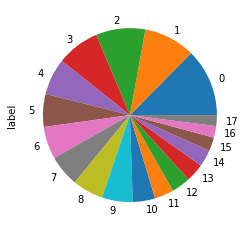

In [65]:
dfTrain.label.value_counts().plot(kind='pie');

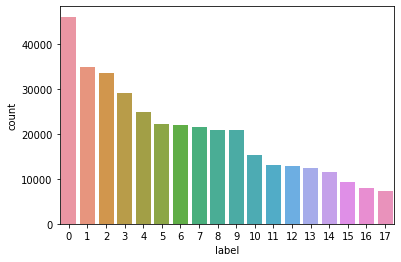

In [66]:
sns.countplot(x="label",data=dfTrain);

In [67]:
dfValid.head()

,text_preprocessed,label
0,اللي يحبك حبو والباقي شخبط عليه,12
1,تذكروا لما الجزيره كانت تحرض علي اسقاط وزعزعه ...,5
2,راح تجد كومه من الاعذار كالتالي والله بعيد وال...,10
3,مايشوف شر بس كبتن طلال كيف فسرتها عنيفه وقويه ...,9
4,المغرب ابدعت ومتعت وشرفت وخرجت والبرتغال فازت,0


In [68]:
print("validData")
pd.DataFrame(data=np.column_stack((dfValid.label.value_counts(), (dfValid.label.value_counts()/len(dfValid)*100))),columns=['Values','Percentage'])

validData


,Values,Percentage
0,5755.0,12.588866
1,4367.0,9.552663
2,4199.0,9.185169
3,3646.0,7.975500
4,3104.0,6.789894
5,2783.0,6.087717
6,2758.0,6.033031
7,2678.0,5.858033
8,2620.0,5.731160
9,2612.0,5.713661


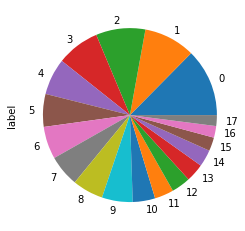

In [69]:
dfValid.label.value_counts().plot(kind='pie');

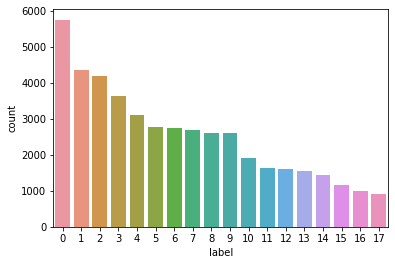

In [70]:
sns.countplot(x="label",data=dfValid);

In [71]:
dfTest.head()

,text_preprocessed,label
0,اضحك بال ذب وهمومي اشكال وب لبي جروح المن اشكي...,13
1,شو مالهم كلهم قالبن عليه,5
2,يوم بيكون فالمنتخب رياييل قطرين تعال انهق غير ...,8
3,هذي السعوديه ون وتو في البليستيشن مب الواقع قب...,4
4,صباح الخير من وطن الخير ووطن العز,8


In [72]:
print("testData")
pd.DataFrame(data=np.column_stack((dfTest.label.value_counts(), (dfTest.label.value_counts()/len(dfTest)*100))),columns=['Values','Percentage'])

testData


,Values,Percentage
0,5756.0,12.590778
1,4368.0,9.554642
2,4200.0,9.187155
3,3647.0,7.977513
4,3105.0,6.791933
5,2784.0,6.089772
6,2757.0,6.030711
7,2678.0,5.857905
8,2620.0,5.731035
9,2612.0,5.713536


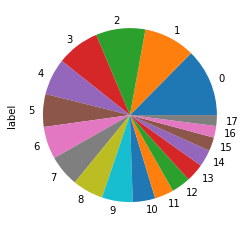

In [73]:
dfTest.label.value_counts().plot(kind='pie');

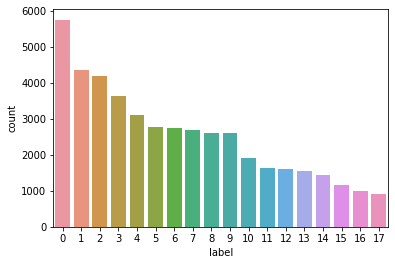

In [74]:
sns.countplot(x="label",data=dfTest);

In [76]:
dfTrain.to_csv('preProcessedTweets_trainF.csv', encoding='utf-8',index = None, header=True)
dfValid.to_csv('preProcessedTweets_validF.csv', encoding='utf-8',index = None, header=True)
dfTest.to_csv('preProcessedTweets_testF.csv'  , encoding='utf-8',index = None, header=True)

In [77]:
dfTrain_10_percent.to_csv('preProcessedTweets_trainF_10_percent.csv', encoding='utf-8',index = None, header=True)
dfValid_10_percent.to_csv('preProcessedTweets_validF_10_percent.csv', encoding='utf-8',index = None, header=True)
dfTest_10_percent.to_csv('preProcessedTweets_testF_10_percent.csv'  , encoding='utf-8',index = None, header=True)

__________________________________________________________________________________________________________________________